In [84]:
import pymongo, os, bson, json, glob, pickle, gridfs, sys, argparse, pickle
from collections import Counter
from sklearn.preprocessing import normalize
from random import sample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.sparse import csr_matrix, random
from bson.binary import Binary
from os.path import join as opj
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn import metrics
from collections import OrderedDict
from bson.son import SON
from pprint import pprint

#Import utilities
sys.path.append("..")
import dbfind #db search tool
import utils
db = dbfind.db 


In [2]:
print(db.list_collection_names())

['tfidf_matrix.files', 'maplogs', 'item_embeddings', 'included_avatars', 'tech_tree', 'lifelogs', 'item_links_demo', 'objects', 'randomized_job_matrix.chunks', 'random_avatar_embeddings', 'expanded_transitions', 'avatar_embeddings', 'tfidf_matrix.chunks', 'transitions', 'activity_matrix.files', 'activity_matrix.chunks', 'cleaned_job_matrix.chunks', 'cleaned_job_matrix.files', 'item_interactions', 'nmf_validation', 'random_item_embeddings', 'activity_labels', 'categories', 'randomized_job_matrix.files']


# Goal: create a DF with the following columns

- Family
- Time (hour intervals)
- Target tech
- Proximity to repertoire
- Diversity
- Developed? (y/n)


## Create a subset of the lifelogs collection that only contains avatar ids in the job matrix analyses 

In [36]:
# #Pull valid avatar and item ids from job matrix
# jobMatrix = 'cleaned'
# #Load cleaned matrix. This takes about 2 mins
# mat_id = list(db.cleaned_job_matrix.files.find())[db.cleaned_job_matrix.files.find().count()-1]['_id'] #get id
# fs = gridfs.GridFS(db, collection='cleaned_job_matrix') 
# mat_bin = fs.get(mat_id) #extract binary
# mat_dict = pickle.load(mat_bin, encoding='latin1')
# itemIds = mat_dict['items']
# avatarIds = mat_dict['avatars']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


In [38]:
#Create new subset collection of only valid ids from the job space analyses; very slow
# db.lifelogs.aggregate([ {'$match':{'avatar':{'$in': avatarIds}}},
#                         { '$out': 'lifelogsSubset' }])

# Construct family demographics

In [39]:
#Aggregate all data into an orderlist of avatar ids; 
famAgg = db.lifelogsSubset.aggregate([{'$group':{'_id':'$family', 'count':{'$sum':1}}}, #Group by family and count the number of avatars
                              {"$sort": SON([("count", -1), ("_id", -1)])}]) #sort

In [40]:
famDict ={}
for q in famAgg:
    print(q)
    famDict[q['_id']] = q['count']
#famDict

{'_id': 'time-1581646929_eve-2692836_name-TINI', 'count': 6566}
{'_id': 'time-1581912417_eve-2704757_name-ADA', 'count': 5361}
{'_id': 'time-1581646981_eve-2692838_name-VOLTAIRE', 'count': 4907}
{'_id': 'time-1581646678_eve-2692823_name-XENAKIS', 'count': 4057}
{'_id': 'time-1579306751_eve-2587939_name-CONNELL', 'count': 3314}
{'_id': 'time-1579308538_eve-2588152_name-SAULER', 'count': 3313}
{'_id': 'time-1579810712_eve-2612994_name-BOOTS', 'count': 3172}
{'_id': 'time-1579810779_eve-2613003_name-(missing)', 'count': 3101}
{'_id': 'time-1579967491_eve-2621464_name-EVA', 'count': 3090}
{'_id': 'time-1580430920_eve-2643825_name-PIE', 'count': 3082}
{'_id': 'time-1612793957_eve-3956867_name-BONER', 'count': 2913}
{'_id': 'time-1579302868_eve-2587423_name-COOL', 'count': 2869}
{'_id': 'time-1580430777_eve-2643822_name-(missing)', 'count': 2710}
{'_id': 'time-1585886948_eve-2850138_name-THINN', 'count': 2678}
{'_id': 'time-1580561533_eve-2649392_name-(missing)', 'count': 2550}
{'_id': 'time

{'_id': 'time-1587134596_eve-2901977_name-BUFFUM', 'count': 19}
{'_id': 'time-1587125576_eve-2901468_name-(missing)', 'count': 19}
{'_id': 'time-1586864475_eve-2886686_name-BE', 'count': 19}
{'_id': 'time-1586717449_eve-2880368_name-(missing)', 'count': 19}
{'_id': 'time-1585440547_eve-2832154_name-THE', 'count': 19}
{'_id': 'time-1585330399_eve-2827965_name-LILLISTON', 'count': 19}
{'_id': 'time-1579104054_eve-2577463_name-FEUER', 'count': 19}
{'_id': 'time-1578552746_eve-2546447_name-MEMS', 'count': 19}
{'_id': 'time-1578462892_eve-2542171_name-AN', 'count': 19}
{'_id': 'time-1578355178_eve-2535895_name-NAVIA', 'count': 19}
{'_id': 'time-1577260736_eve-2463975_name-JO', 'count': 19}
{'_id': 'time-1577120633_eve-2456051_name-WHISLER', 'count': 19}
{'_id': 'time-1576295977_eve-2409287_name-GARY', 'count': 19}
{'_id': 'time-1576000367_eve-2395879_name-NOOD', 'count': 19}
{'_id': 'time-1574849305_eve-2338585_name-(missing)', 'count': 19}
{'_id': 'time-1574637001_eve-2327858_name-MELA', '

{'_id': 'time-1617390252_eve-4099703_name-(missing)', 'count': 1}
{'_id': 'time-1617390195_eve-4099699_name-(missing)', 'count': 1}
{'_id': 'time-1617390138_eve-4099697_name-(missing)', 'count': 1}
{'_id': 'time-1617389480_eve-4099668_name-(missing)', 'count': 1}
{'_id': 'time-1617389436_eve-4099666_name-(missing)', 'count': 1}
{'_id': 'time-1617389349_eve-4099664_name-ROSE', 'count': 1}
{'_id': 'time-1617389157_eve-4099655_name-(missing)', 'count': 1}
{'_id': 'time-1617388224_eve-4099617_name-(missing)', 'count': 1}
{'_id': 'time-1617388088_eve-4099607_name-(missing)', 'count': 1}
{'_id': 'time-1617388084_eve-4099604_name-JASON', 'count': 1}
{'_id': 'time-1617387574_eve-4099577_name-SATISH', 'count': 1}
{'_id': 'time-1617387428_eve-4099571_name-(missing)', 'count': 1}
{'_id': 'time-1617387195_eve-4099560_name-(missing)', 'count': 1}
{'_id': 'time-1617386627_eve-4099528_name-(missing)', 'count': 1}
{'_id': 'time-1617386089_eve-4099508_name-(missing)', 'count': 1}
{'_id': 'time-16173860

{'_id': 'time-1612449536_eve-3945241_name-(missing)', 'count': 1}
{'_id': 'time-1612432407_eve-3944925_name-LADICK', 'count': 1}
{'_id': 'time-1612430625_eve-3944896_name-(missing)', 'count': 1}
{'_id': 'time-1612430471_eve-3944890_name-(missing)', 'count': 1}
{'_id': 'time-1612430370_eve-3944889_name-(missing)', 'count': 1}
{'_id': 'time-1612422356_eve-3944688_name-(missing)', 'count': 1}
{'_id': 'time-1612414194_eve-3944496_name-(missing)', 'count': 1}
{'_id': 'time-1612411782_eve-3944398_name-(missing)', 'count': 1}
{'_id': 'time-1612411782_eve-3944397_name-(missing)', 'count': 1}
{'_id': 'time-1612410677_eve-3944360_name-(missing)', 'count': 1}
{'_id': 'time-1612410677_eve-3944359_name-(missing)', 'count': 1}
{'_id': 'time-1612410171_eve-3944341_name-(missing)', 'count': 1}
{'_id': 'time-1612409976_eve-3944335_name-(missing)', 'count': 1}
{'_id': 'time-1612409976_eve-3944334_name-(missing)', 'count': 1}
{'_id': 'time-1612409822_eve-3944312_name-(missing)', 'count': 1}
{'_id': 'time

{'_id': 'time-1590317003_eve-3020868_name-(missing)', 'count': 1}
{'_id': 'time-1590316973_eve-3020867_name-(missing)', 'count': 1}
{'_id': 'time-1590316929_eve-3020865_name-(missing)', 'count': 1}
{'_id': 'time-1590316875_eve-3020862_name-(missing)', 'count': 1}
{'_id': 'time-1590316812_eve-3020861_name-(missing)', 'count': 1}
{'_id': 'time-1590316764_eve-3020859_name-(missing)', 'count': 1}
{'_id': 'time-1590316704_eve-3020857_name-(missing)', 'count': 1}
{'_id': 'time-1590316691_eve-3020856_name-(missing)', 'count': 1}
{'_id': 'time-1590316644_eve-3020855_name-(missing)', 'count': 1}
{'_id': 'time-1590316620_eve-3020853_name-(missing)', 'count': 1}
{'_id': 'time-1590316517_eve-3020849_name-(missing)', 'count': 1}
{'_id': 'time-1590316446_eve-3020848_name-(missing)', 'count': 1}
{'_id': 'time-1590316225_eve-3020841_name-(missing)', 'count': 1}
{'_id': 'time-1590316161_eve-3020840_name-(missing)', 'count': 1}
{'_id': 'time-1590316059_eve-3020837_name-(missing)', 'count': 1}
{'_id': 't

{'_id': 'time-1589737706_eve-3004914_name-(missing)', 'count': 1}
{'_id': 'time-1589737567_eve-3004907_name-(missing)', 'count': 1}
{'_id': 'time-1589737519_eve-3004905_name-(missing)', 'count': 1}
{'_id': 'time-1589737465_eve-3004902_name-(missing)', 'count': 1}
{'_id': 'time-1589737195_eve-3004893_name-(missing)', 'count': 1}
{'_id': 'time-1589737030_eve-3004890_name-(missing)', 'count': 1}
{'_id': 'time-1589736175_eve-3004856_name-(missing)', 'count': 1}
{'_id': 'time-1589735478_eve-3004841_name-(missing)', 'count': 1}
{'_id': 'time-1589735072_eve-3004829_name-(missing)', 'count': 1}
{'_id': 'time-1589734065_eve-3004802_name-(missing)', 'count': 1}
{'_id': 'time-1589734026_eve-3004799_name-(missing)', 'count': 1}
{'_id': 'time-1589733902_eve-3004796_name-(missing)', 'count': 1}
{'_id': 'time-1589733546_eve-3004779_name-(missing)', 'count': 1}
{'_id': 'time-1589731425_eve-3004682_name-(blank)', 'count': 1}
{'_id': 'time-1589729489_eve-3004606_name-(missing)', 'count': 1}
{'_id': 'tim

{'_id': 'time-1588719900_eve-2969917_name-(missing)', 'count': 1}
{'_id': 'time-1588719798_eve-2969916_name-(missing)', 'count': 1}
{'_id': 'time-1588719108_eve-2969894_name-IAMS', 'count': 1}
{'_id': 'time-1588719011_eve-2969893_name-(missing)', 'count': 1}
{'_id': 'time-1588718935_eve-2969892_name-(missing)', 'count': 1}
{'_id': 'time-1588718825_eve-2969890_name-GAY', 'count': 1}
{'_id': 'time-1588717777_eve-2969869_name-(missing)', 'count': 1}
{'_id': 'time-1588715797_eve-2969781_name-(missing)', 'count': 1}
{'_id': 'time-1588715744_eve-2969779_name-(missing)', 'count': 1}
{'_id': 'time-1588715436_eve-2969772_name-HEATHER', 'count': 1}
{'_id': 'time-1588715323_eve-2969767_name-(missing)', 'count': 1}
{'_id': 'time-1588714729_eve-2969747_name-(missing)', 'count': 1}
{'_id': 'time-1588714477_eve-2969736_name-(missing)', 'count': 1}
{'_id': 'time-1588714378_eve-2969732_name-(missing)', 'count': 1}
{'_id': 'time-1588713802_eve-2969702_name-(missing)', 'count': 1}
{'_id': 'time-158871324

{'_id': 'time-1588039960_eve-2943824_name-(missing)', 'count': 1}
{'_id': 'time-1588038411_eve-2943790_name-(missing)', 'count': 1}
{'_id': 'time-1588038209_eve-2943786_name-(missing)', 'count': 1}
{'_id': 'time-1588037099_eve-2943758_name-(missing)', 'count': 1}
{'_id': 'time-1588036973_eve-2943752_name-(missing)', 'count': 1}
{'_id': 'time-1588036911_eve-2943749_name-(missing)', 'count': 1}
{'_id': 'time-1588036512_eve-2943727_name-(missing)', 'count': 1}
{'_id': 'time-1588034817_eve-2943627_name-(missing)', 'count': 1}
{'_id': 'time-1588034227_eve-2943578_name-(missing)', 'count': 1}
{'_id': 'time-1588033936_eve-2943561_name-SWAGEL', 'count': 1}
{'_id': 'time-1588033445_eve-2943524_name-(missing)', 'count': 1}
{'_id': 'time-1588033059_eve-2943478_name-(missing)', 'count': 1}
{'_id': 'time-1588033003_eve-2943471_name-(missing)', 'count': 1}
{'_id': 'time-1588032867_eve-2943453_name-(missing)', 'count': 1}
{'_id': 'time-1588032788_eve-2943445_name-(missing)', 'count': 1}
{'_id': 'time

{'_id': 'time-1587384843_eve-2915665_name-(missing)', 'count': 1}
{'_id': 'time-1587384823_eve-2915662_name-(missing)', 'count': 1}
{'_id': 'time-1587384797_eve-2915660_name-(missing)', 'count': 1}
{'_id': 'time-1587384785_eve-2915659_name-(missing)', 'count': 1}
{'_id': 'time-1587384746_eve-2915656_name-(missing)', 'count': 1}
{'_id': 'time-1587384660_eve-2915652_name-(missing)', 'count': 1}
{'_id': 'time-1587384630_eve-2915651_name-(missing)', 'count': 1}
{'_id': 'time-1587384603_eve-2915650_name-TETT', 'count': 1}
{'_id': 'time-1587384587_eve-2915648_name-(missing)', 'count': 1}
{'_id': 'time-1587384487_eve-2915645_name-(missing)', 'count': 1}
{'_id': 'time-1587384410_eve-2915640_name-(missing)', 'count': 1}
{'_id': 'time-1587383473_eve-2915592_name-(missing)', 'count': 1}
{'_id': 'time-1587383305_eve-2915586_name-(missing)', 'count': 1}
{'_id': 'time-1587383134_eve-2915571_name-(missing)', 'count': 1}
{'_id': 'time-1587383118_eve-2915570_name-(missing)', 'count': 1}
{'_id': 'time-1

{'_id': 'time-1586825089_eve-2885013_name-(missing)', 'count': 1}
{'_id': 'time-1586825001_eve-2884999_name-FIRESTONE', 'count': 1}
{'_id': 'time-1586824870_eve-2884982_name-(missing)', 'count': 1}
{'_id': 'time-1586824870_eve-2884981_name-(missing)', 'count': 1}
{'_id': 'time-1586824828_eve-2884979_name-(missing)', 'count': 1}
{'_id': 'time-1586824756_eve-2884973_name-(missing)', 'count': 1}
{'_id': 'time-1586824667_eve-2884963_name-(missing)', 'count': 1}
{'_id': 'time-1586824568_eve-2884959_name-STUCK', 'count': 1}
{'_id': 'time-1586824528_eve-2884957_name-(missing)', 'count': 1}
{'_id': 'time-1586824460_eve-2884954_name-(missing)', 'count': 1}
{'_id': 'time-1586824384_eve-2884944_name-FIRESTONE', 'count': 1}
{'_id': 'time-1586824208_eve-2884929_name-GABOR', 'count': 1}
{'_id': 'time-1586824187_eve-2884928_name-DOBBIE', 'count': 1}
{'_id': 'time-1586823606_eve-2884897_name-(missing)', 'count': 1}
{'_id': 'time-1586821819_eve-2884833_name-(missing)', 'count': 1}
{'_id': 'time-1586821

{'_id': 'time-1586018398_eve-2855135_name-(missing)', 'count': 1}
{'_id': 'time-1586018339_eve-2855130_name-NEWAGO', 'count': 1}
{'_id': 'time-1586017709_eve-2855117_name-(missing)', 'count': 1}
{'_id': 'time-1586017686_eve-2855116_name-(missing)', 'count': 1}
{'_id': 'time-1586017683_eve-2855115_name-(missing)', 'count': 1}
{'_id': 'time-1586017245_eve-2855106_name-(missing)', 'count': 1}
{'_id': 'time-1586016648_eve-2855081_name-(missing)', 'count': 1}
{'_id': 'time-1586016568_eve-2855077_name-NEW', 'count': 1}
{'_id': 'time-1586016473_eve-2855073_name-(missing)', 'count': 1}
{'_id': 'time-1586016405_eve-2855069_name-(missing)', 'count': 1}
{'_id': 'time-1586016201_eve-2855061_name-STUCK', 'count': 1}
{'_id': 'time-1586016188_eve-2855059_name-(missing)', 'count': 1}
{'_id': 'time-1586016172_eve-2855057_name-(missing)', 'count': 1}
{'_id': 'time-1586016020_eve-2855054_name-(missing)', 'count': 1}
{'_id': 'time-1586015916_eve-2855052_name-NOT', 'count': 1}
{'_id': 'time-1586015831_eve-

{'_id': 'time-1584896367_eve-2813228_name-(missing)', 'count': 1}
{'_id': 'time-1584896299_eve-2813224_name-(missing)', 'count': 1}
{'_id': 'time-1584893508_eve-2813089_name-LOVE', 'count': 1}
{'_id': 'time-1584893469_eve-2813086_name-(missing)', 'count': 1}
{'_id': 'time-1584893431_eve-2813084_name-(missing)', 'count': 1}
{'_id': 'time-1584893394_eve-2813079_name-(missing)', 'count': 1}
{'_id': 'time-1584893349_eve-2813077_name-(missing)', 'count': 1}
{'_id': 'time-1584893304_eve-2813074_name-(missing)', 'count': 1}
{'_id': 'time-1584893267_eve-2813070_name-(missing)', 'count': 1}
{'_id': 'time-1584893211_eve-2813067_name-(missing)', 'count': 1}
{'_id': 'time-1584889966_eve-2812920_name-(missing)', 'count': 1}
{'_id': 'time-1584889407_eve-2812870_name-(missing)', 'count': 1}
{'_id': 'time-1584888048_eve-2812819_name-(missing)', 'count': 1}
{'_id': 'time-1584886804_eve-2812723_name-(missing)', 'count': 1}
{'_id': 'time-1584886229_eve-2812698_name-(missing)', 'count': 1}
{'_id': 'time-1

{'_id': 'time-1583425090_eve-2757865_name-(missing)', 'count': 1}
{'_id': 'time-1583424350_eve-2757848_name-(missing)', 'count': 1}
{'_id': 'time-1583424341_eve-2757847_name-(missing)', 'count': 1}
{'_id': 'time-1583424332_eve-2757846_name-(missing)', 'count': 1}
{'_id': 'time-1583423652_eve-2757826_name-(missing)', 'count': 1}
{'_id': 'time-1583420457_eve-2757784_name-(missing)', 'count': 1}
{'_id': 'time-1583420447_eve-2757783_name-(missing)', 'count': 1}
{'_id': 'time-1583413275_eve-2757628_name-(missing)', 'count': 1}
{'_id': 'time-1583411750_eve-2757602_name-(missing)', 'count': 1}
{'_id': 'time-1583410312_eve-2757576_name-(missing)', 'count': 1}
{'_id': 'time-1583409866_eve-2757571_name-(missing)', 'count': 1}
{'_id': 'time-1583407745_eve-2757525_name-(missing)', 'count': 1}
{'_id': 'time-1583407674_eve-2757523_name-(missing)', 'count': 1}
{'_id': 'time-1583406875_eve-2757506_name-(missing)', 'count': 1}
{'_id': 'time-1583401460_eve-2757402_name-(missing)', 'count': 1}
{'_id': 't

{'_id': 'time-1582151507_eve-2713716_name-BOBO', 'count': 1}
{'_id': 'time-1582151489_eve-2713714_name-GOLD', 'count': 1}
{'_id': 'time-1582151436_eve-2713713_name-(missing)', 'count': 1}
{'_id': 'time-1582151424_eve-2713712_name-GOLD', 'count': 1}
{'_id': 'time-1582150858_eve-2713695_name-(missing)', 'count': 1}
{'_id': 'time-1582150858_eve-2713694_name-ON', 'count': 1}
{'_id': 'time-1582150777_eve-2713692_name-(missing)', 'count': 1}
{'_id': 'time-1582150343_eve-2713671_name-(missing)', 'count': 1}
{'_id': 'time-1582150311_eve-2713670_name-(missing)', 'count': 1}
{'_id': 'time-1582150021_eve-2713655_name-GOLD', 'count': 1}
{'_id': 'time-1582148656_eve-2713614_name-(missing)', 'count': 1}
{'_id': 'time-1582148332_eve-2713607_name-(missing)', 'count': 1}
{'_id': 'time-1582148155_eve-2713599_name-JUST', 'count': 1}
{'_id': 'time-1582148121_eve-2713596_name-(missing)', 'count': 1}
{'_id': 'time-1582148070_eve-2713593_name-(missing)', 'count': 1}
{'_id': 'time-1582147961_eve-2713589_name-

{'_id': 'time-1579914574_eve-2618662_name-(missing)', 'count': 1}
{'_id': 'time-1579914418_eve-2618636_name-(missing)', 'count': 1}
{'_id': 'time-1579913973_eve-2618612_name-ROWL', 'count': 1}
{'_id': 'time-1579913694_eve-2618590_name-(missing)', 'count': 1}
{'_id': 'time-1579913671_eve-2618589_name-(missing)', 'count': 1}
{'_id': 'time-1579913547_eve-2618579_name-(missing)', 'count': 1}
{'_id': 'time-1579913404_eve-2618566_name-(missing)', 'count': 1}
{'_id': 'time-1579912465_eve-2618496_name-(missing)', 'count': 1}
{'_id': 'time-1579912388_eve-2618490_name-(missing)', 'count': 1}
{'_id': 'time-1579912026_eve-2618473_name-JUST', 'count': 1}
{'_id': 'time-1579911873_eve-2618465_name-(missing)', 'count': 1}
{'_id': 'time-1579911865_eve-2618464_name-DANIEL', 'count': 1}
{'_id': 'time-1579911832_eve-2618461_name-(missing)', 'count': 1}
{'_id': 'time-1579910605_eve-2618372_name-(missing)', 'count': 1}
{'_id': 'time-1579910037_eve-2618306_name-(missing)', 'count': 1}
{'_id': 'time-157990927

{'_id': 'time-1576974650_eve-2447341_name-(missing)', 'count': 1}
{'_id': 'time-1576974498_eve-2447329_name-(missing)', 'count': 1}
{'_id': 'time-1576974401_eve-2447325_name-(missing)', 'count': 1}
{'_id': 'time-1576974269_eve-2447317_name-(missing)', 'count': 1}
{'_id': 'time-1576969690_eve-2446959_name-(missing)', 'count': 1}
{'_id': 'time-1576967025_eve-2446781_name-(missing)', 'count': 1}
{'_id': 'time-1576965807_eve-2446674_name-(missing)', 'count': 1}
{'_id': 'time-1576965694_eve-2446665_name-BLOODWORTH', 'count': 1}
{'_id': 'time-1576965016_eve-2446610_name-LEGENDRE', 'count': 1}
{'_id': 'time-1576964376_eve-2446561_name-(missing)', 'count': 1}
{'_id': 'time-1576963835_eve-2446518_name-(missing)', 'count': 1}
{'_id': 'time-1576954544_eve-2445768_name-(missing)', 'count': 1}
{'_id': 'time-1576946506_eve-2445119_name-(missing)', 'count': 1}
{'_id': 'time-1576933603_eve-2444312_name-(missing)', 'count': 1}
{'_id': 'time-1576931000_eve-2444174_name-(missing)', 'count': 1}
{'_id': 't

In [46]:
print(len(famDict))
print(np.mean(list(famDict.values())))
print(np.median(list(famDict.values())))

30755
16.280052024061128
1.0


# Diversity

In [95]:
def diversity(fam):
    '''
    Computes diversity of jobs within a family using a form of Krugman specialization
    '''
    avatarIds = [x[0] for x in dbfind.avatar(fam, target='family', fields = ['avatar'])]  #all avatar ids within family
    jobVecs = np.array(dbfind.avatarVec(avatarIds)) # return an array of each avatar's job vector
    #normalize all avatar vecs
    sum_of_rows = jobVecs.sum(axis=1)
    normalized_jobVecs = jobVecs / sum_of_rows[:, np.newaxis]
    #Mean of family
    meanVec = np.mean(normalized_jobVecs, axis=0)
    #Compute diversity
    diversity = []
    for a in np.arange(normalized_jobVecs.shape[0]):
        diversity.append(np.abs(normalized_jobVecs[a,] - meanVec).sum()) #Krugman specialization
    return(np.mean(diversity), meanVec)

0.9499474300796865


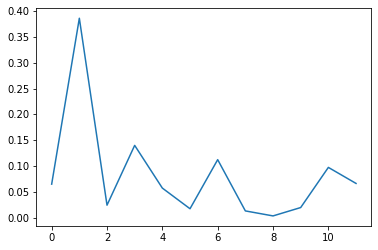

In [97]:
#test using a relatively small family (low on the ranked order of family sizes)
(d, meanVec) = diversity(list(famDict.keys())[2000]) 
print(d)
plt.plot(meanVec)

0.9303844749379516


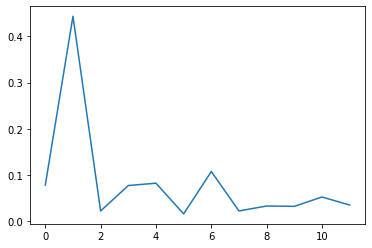

In [98]:
#test using a relatively small family (low on the ranked order of family sizes)
(d, meanVec) = diversity(list(famDict.keys())[100]) 
print(d)
plt.plot(meanVec)